# Heart Disease Prediction

* About the Dataset:

The dataset used for this project is the Heart Disease UCI, which is collected from the https://www.kaggle.com/competitions/heart-disease-prediction-tfug-chd-oct-2022

* Total no. of features: 13\n",
* No .of instances: 303\n",
* Attribute information: \n",
* age: age of the patient [years]
* sex: (0: Male, 1: Female)
* chest pain type: chest pain type [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
* resting bp s: resting blood pressure [mm Hg]
* cholesterol: serum cholesterol [mm/dl]
* fasting blood sugar: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* resting ECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* max heart rate: maximum heart rate achieved [Numeric value between 60 and 202]
* exercise angina: (0: No, 1: Yes)
* oldpeak: ST [Numeric value measured in depression]
* ST slope: the slope of the peak exercise ST segment
* target: [0: Normal, 1: Heart disease]

## Importing Necessary Libraries

In [30]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

* Loading Data

In [31]:
df = pd.read_csv("./train.csv")
df

,index,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,72,1,2,136,209,1,0,111,1,-2.916701,3,1
1,1,61,1,3,113,341,0,0,186,1,1.317159,1,1
2,2,60,1,4,128,388,0,2,103,1,0.061226,1,0
3,3,65,1,3,136,201,1,2,142,0,1.230714,2,1
4,4,60,1,4,115,331,1,0,141,0,-0.162745,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835,36,1,2,138,147,0,2,108,0,1.731443,1,0
836,836,47,1,4,125,233,0,2,179,1,0.624012,1,0
837,837,49,1,3,170,110,1,0,144,1,1.647733,2,0
838,838,57,1,2,104,182,0,0,109,1,0.038568,3,1


## Getting Insights of Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                840 non-null    int64  
 1   age                  840 non-null    int64  
 2   sex                  840 non-null    int64  
 3   chest pain type      840 non-null    int64  
 4   resting bp s         840 non-null    int64  
 5   cholesterol          840 non-null    int64  
 6   fasting blood sugar  840 non-null    int64  
 7   resting ecg          840 non-null    int64  
 8   max heart rate       840 non-null    int64  
 9   exercise angina      840 non-null    int64  
 10  oldpeak              840 non-null    float64
 11  ST slope             840 non-null    int64  
 12  target               840 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 85.4 KB


In [33]:
df.describe()

,index,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,419.500000,54.301190,0.726190,3.230952,133.454762,258.322619,0.261905,0.792857,132.892857,0.403571,0.650939,1.597619,0.540476
std,242.631408,13.420085,0.446178,1.061402,26.463285,87.607095,0.439933,0.878804,35.072585,0.490906,1.051711,0.805224,0.498656
min,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-3.556082,0.000000,0.000000
25%,209.750000,43.000000,0.000000,2.000000,115.000000,195.750000,0.000000,0.000000,106.000000,0.000000,-0.029708,1.000000,0.000000
50%,419.500000,56.000000,1.000000,4.000000,132.000000,248.000000,0.000000,0.000000,135.000000,0.000000,0.388447,2.000000,1.000000
75%,629.250000,65.000000,1.000000,4.000000,148.500000,310.000000,1.000000,2.000000,161.000000,1.000000,1.325335,2.000000,1.000000
max,839.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,4.454408,3.000000,1.000000


In [34]:
print(df.isna().sum())
print(df.duplicated().sum())

index                  0
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
0


* There are no NULL or NAN values and Duplicate Values in the data

In [35]:
df.groupby("target")["sex"].mean()

target
0    0.751295
1    0.704846
Name: sex, dtype: float64

In [36]:
df.groupby("target")["max heart rate"].max()

target
0    202
1    202
Name: max heart rate, dtype: int64

In [37]:
df.groupby("chest pain type")["target"].mean()

chest pain type
0    0.600000
1    0.564103
2    0.514925
3    0.564516
4    0.537074
Name: target, dtype: float64

## VISULAIZATION OF DATASET

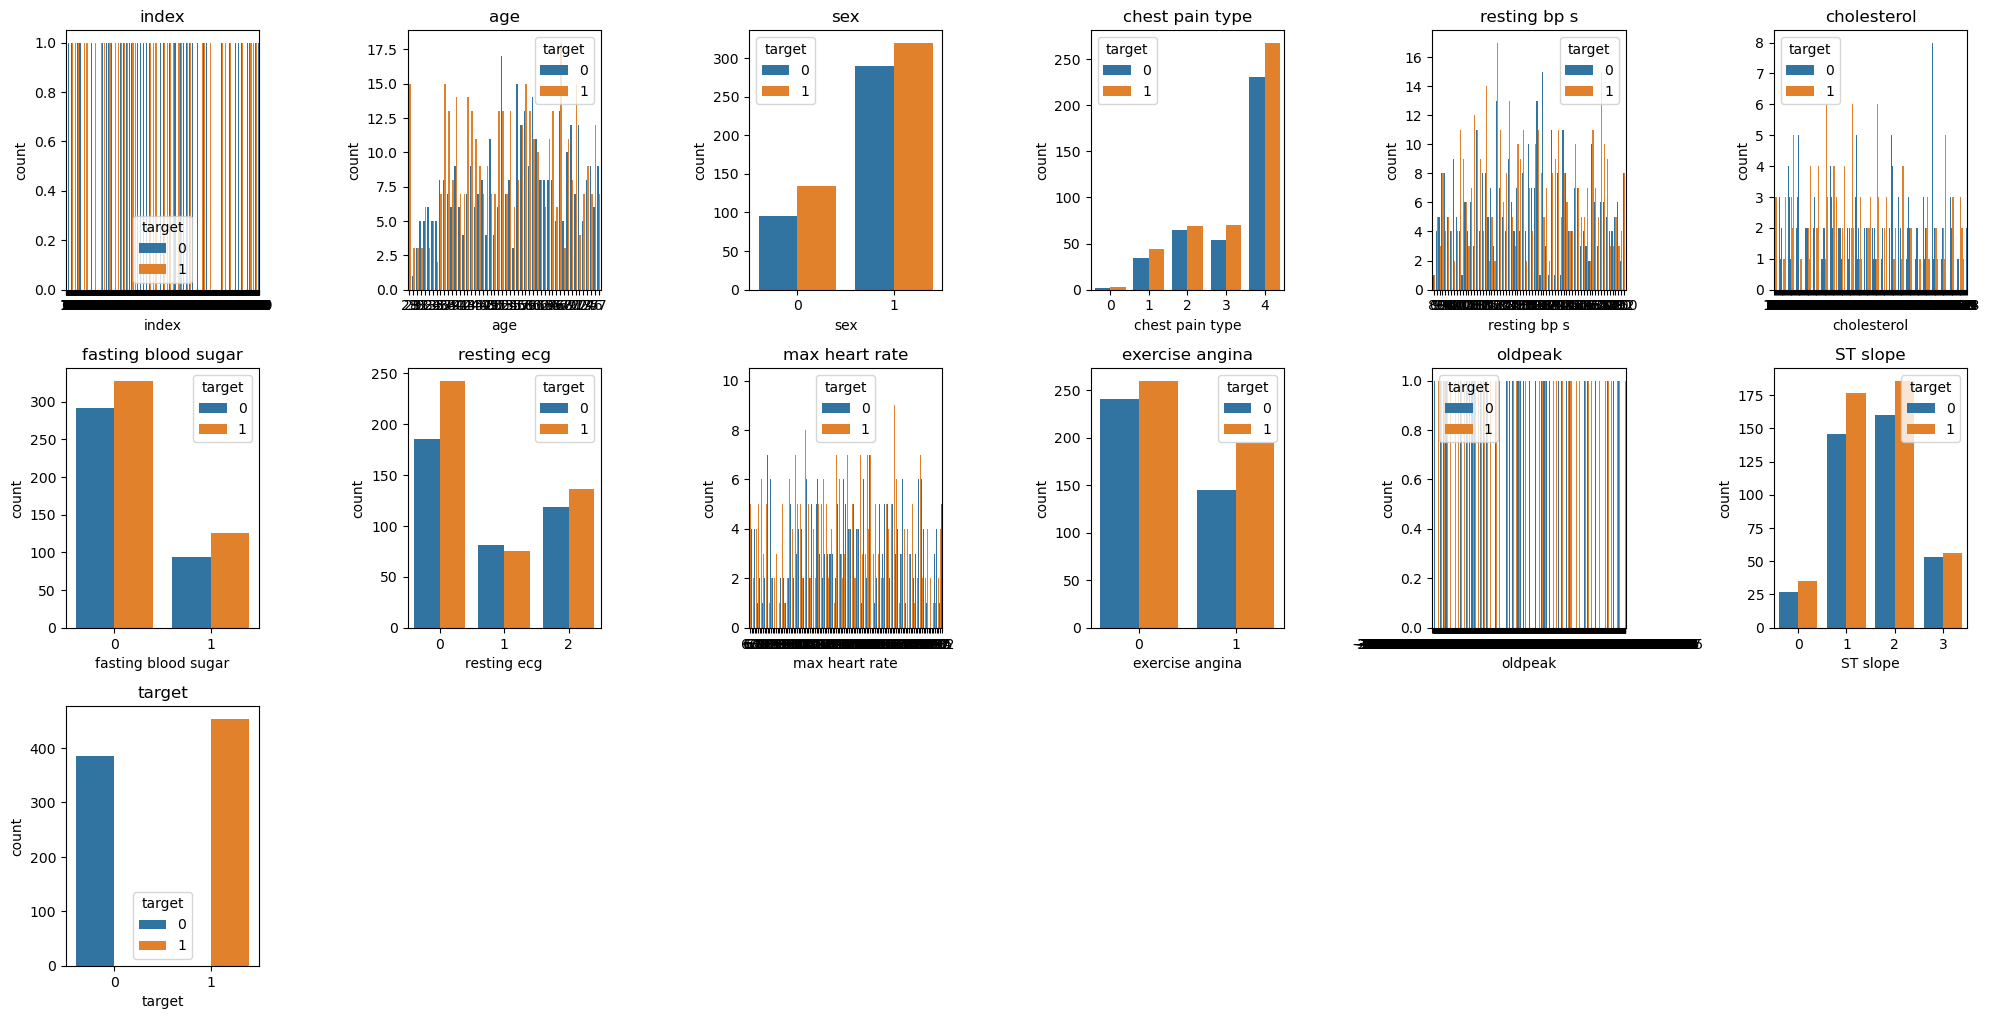

In [38]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(6,6,i+1)
    plt.title(list[i])
    sns.countplot(data=df,x=list[i],hue="target")
plt.tight_layout()

<Axes: xlabel='age', ylabel='Density'>

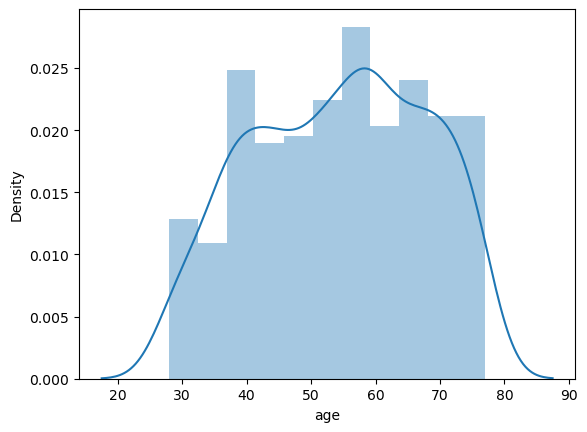

In [39]:
sns.distplot(df['age'])

<Axes: xlabel='resting bp s', ylabel='Density'>

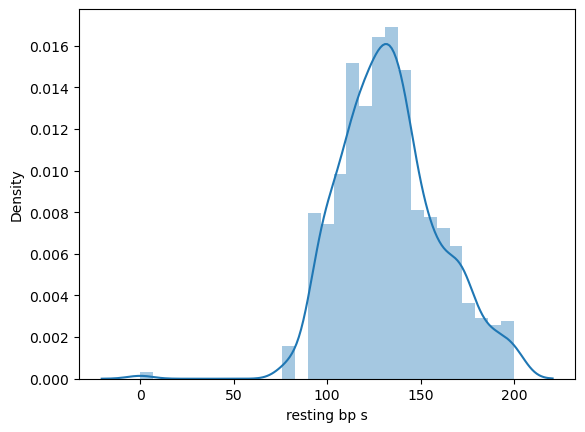

In [40]:
sns.distplot(df['resting bp s'])

<Axes: xlabel='cholesterol', ylabel='Density'>

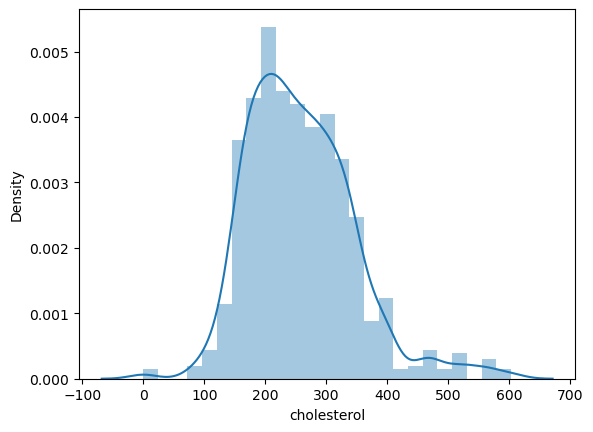

In [41]:
sns.distplot(df['cholesterol'])

<Axes: xlabel='max heart rate', ylabel='Density'>

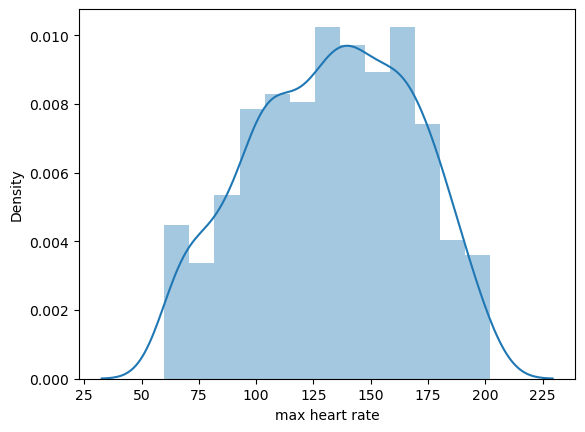

In [42]:
sns.distplot(df['max heart rate'])

<Axes: xlabel='oldpeak', ylabel='Density'>

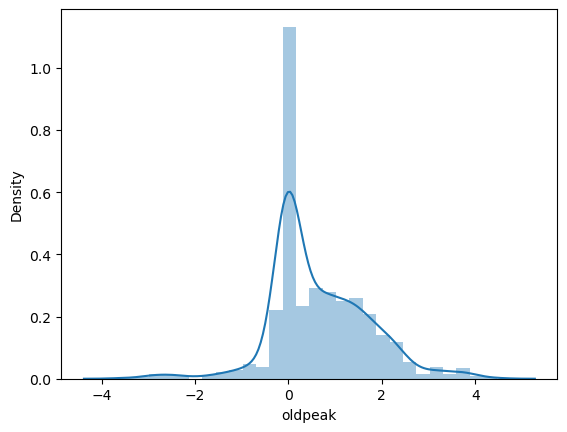

In [43]:
sns.distplot(df['oldpeak'])

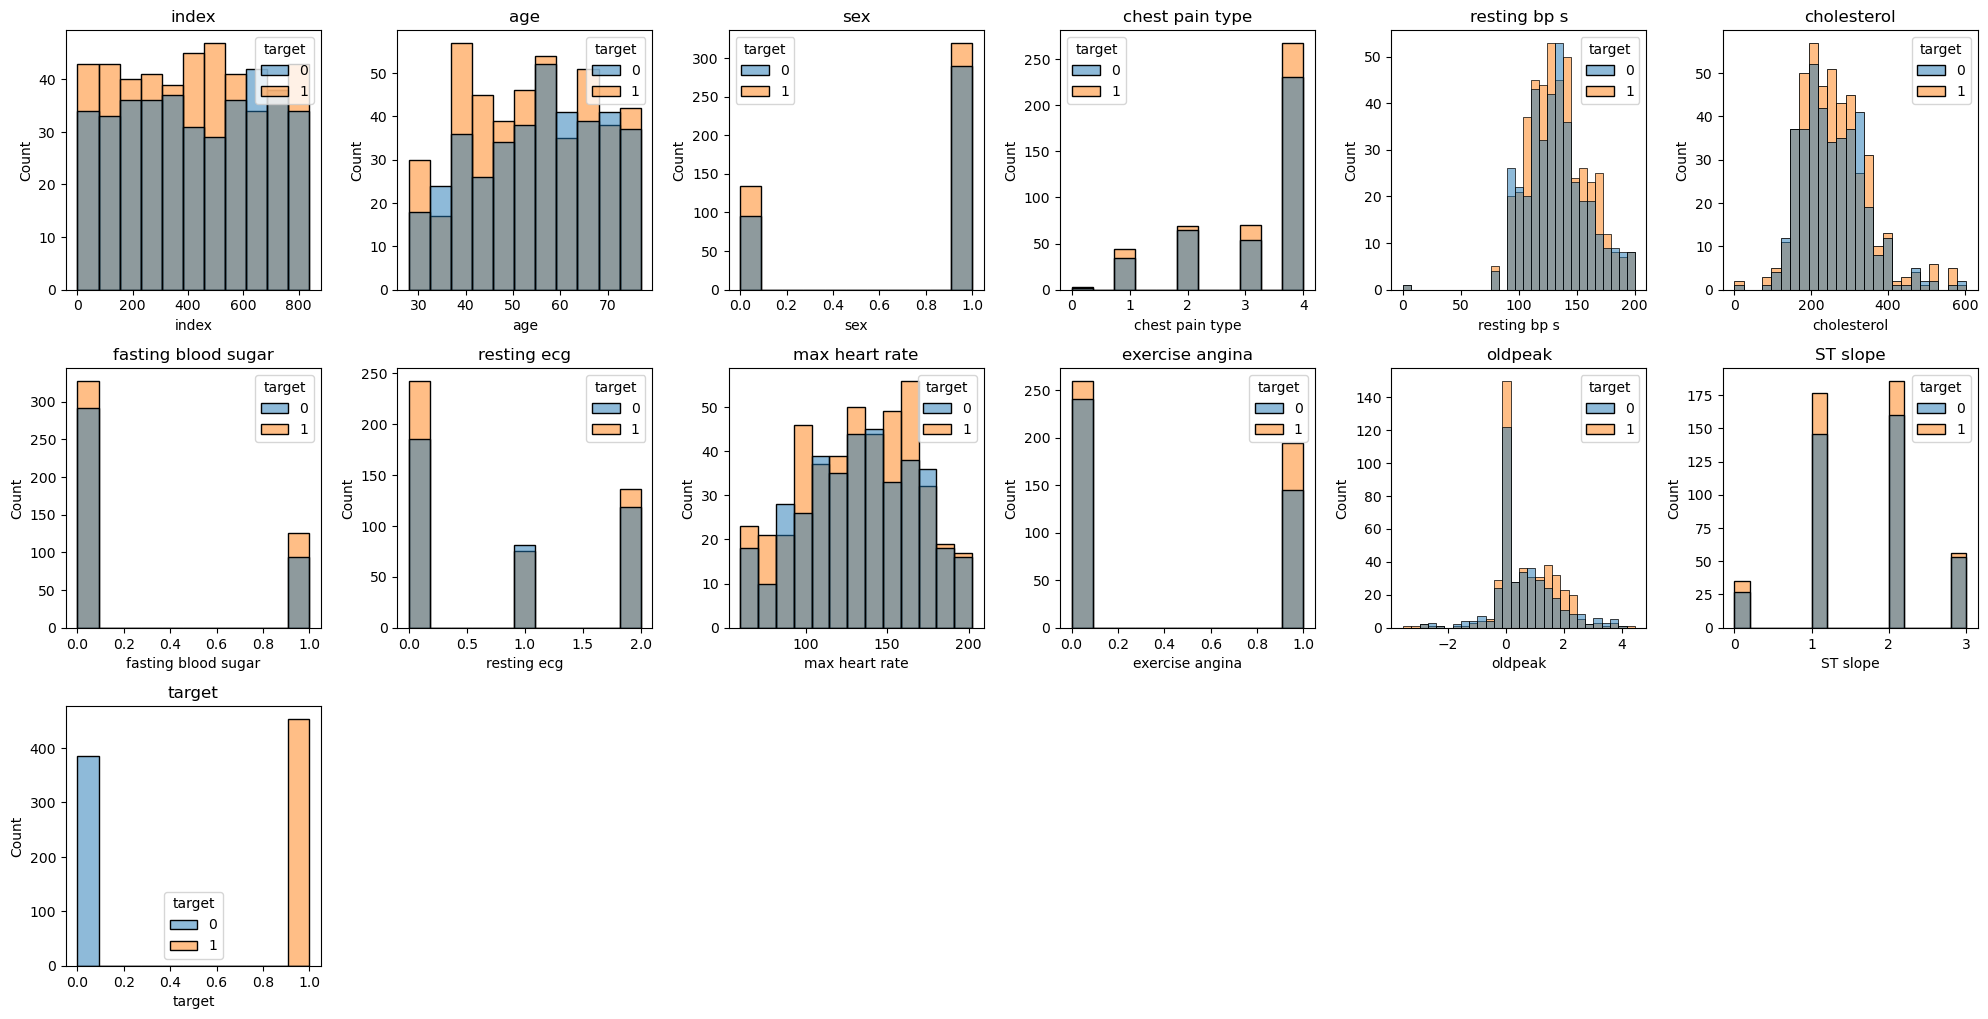

In [44]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(6,6,i+1)
    plt.title(list[i])
    sns.histplot(data=df,x=list[i],hue="target")
plt.tight_layout()

# Implementing Machine Learning Algorithms for Classifications

### Pre-processing Data for model training

* Storing target colums in Y and independent variables in X

In [45]:
index_to_exclude = df.columns.get_loc('target')
X = df.iloc[:, [i for i in range(df.shape[1]) if i != index_to_exclude]].values
y = df.iloc[:,index_to_exclude].values

* Spliting the X and y for training and testing in 80 to 20 ratio

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
RF_model = RandomForestClassifier(n_estimators= 150)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [62]:
RF_model.score(X_train , y_train)

1.0

In [63]:
RF_pred = RF_model.predict(X_test)
rf=accuracy_score(y_test , RF_pred)
rf

0.5

In [64]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.58      0.27      0.37        91
           1       0.47      0.77      0.58        77

    accuracy                           0.50       168
   macro avg       0.53      0.52      0.48       168
weighted avg       0.53      0.50      0.47       168



* Training Support Vector Classifier

In [51]:
svc = svm.SVC(kernel='linear', gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [52]:
svc.score(X_train , y_train)

0.5610119047619048

In [53]:
svc_pred = svc.predict(X_test)
svc=accuracy_score(y_test , svc_pred)
svc

0.4583333333333333

In [54]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.46      1.00      0.63        77

    accuracy                           0.46       168
   macro avg       0.23      0.50      0.31       168
weighted avg       0.21      0.46      0.29       168



* Training Decision Tree Classifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
dt.score(X_train , y_train)

1.0

In [57]:
dt_pred = dt.predict(X_test)
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.5059523809523809

In [58]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.56      0.40      0.46        91
           1       0.47      0.64      0.54        77

    accuracy                           0.51       168
   macro avg       0.52      0.52      0.50       168
weighted avg       0.52      0.51      0.50       168



In [59]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[rf,svc,DT_acc]})
models

,models,scores
0,Random_forest,0.500000
1,SVC,0.458333
2,Decsion_Treee,0.505952


* Ploting the DataFrame of models

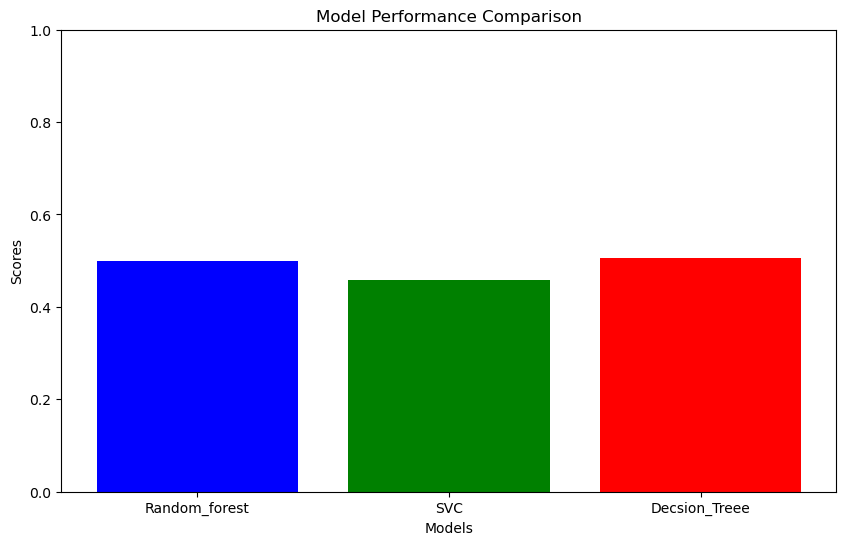

In [65]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models['models'], models['scores'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Ensuring the y-axis goes from 0 to 1
plt.show()